In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
patients = pd.read_csv('PATIENTS.csv')
patients.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [3]:
admissions = pd.read_csv('ADMISSIONS.csv')
admissions.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [4]:
diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')
diagnoses.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,112344,10006,142345,1,99591
1,112345,10006,142345,2,99662
2,112346,10006,142345,3,5672
3,112347,10006,142345,4,40391
4,112348,10006,142345,5,42731


In [5]:
diagnoses_labels = pd.read_csv('D_ICD_DIAGNOSES.csv')
diagnoses_labels.head()

,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [6]:
icustays = pd.read_csv('ICUSTAYS.csv')
icustays.head()

,row_id,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
1,12747,10011,105331,232110,carevue,MICU,MICU,15,15,2126-08-14 22:34:00,2126-08-28 18:59:00,13.8507
2,12749,10013,165520,264446,carevue,MICU,MICU,15,15,2125-10-04 23:38:00,2125-10-07 15:13:52,2.6499
3,12754,10017,199207,204881,carevue,CCU,CCU,7,7,2149-05-29 18:52:29,2149-05-31 22:19:17,2.1436
4,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43:56,2163-05-16 03:47:04,1.2938


In [7]:
services = pd.read_csv('SERVICES.csv')
services.head()

,row_id,subject_id,hadm_id,transfertime,prev_service,curr_service
0,14974,10006,142345,2164-10-23 21:10:15,NaN,MED
1,14979,10011,105331,2126-08-14 22:34:00,NaN,MED
2,14981,10013,165520,2125-10-04 23:38:00,NaN,MED
3,14985,10017,199207,2149-05-26 17:21:09,NaN,MED
4,14986,10019,177759,2163-05-14 20:43:56,NaN,MED


In [8]:
cpt_events = pd.read_csv('CPTEVENTS.csv')
cpt_events.head()

,row_id,subject_id,hadm_id,costcenter,chartdate,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq,sectionheader,subsectionheader,description
0,4615,10117,105150,ICU,NaN,99254,99254,NaN,1.0,Evaluation and management,Consultations,NaN
1,4616,10117,105150,ICU,NaN,99231,99231,NaN,2.0,Evaluation and management,Hospital inpatient services,NaN
2,4617,10117,105150,ICU,NaN,90935,90935,NaN,3.0,Medicine,Dialysis,NaN
3,4618,10117,105150,ICU,NaN,99231,99231,NaN,4.0,Evaluation and management,Hospital inpatient services,NaN
4,7753,10111,174739,ICU,NaN,99253,99253,NaN,1.0,Evaluation and management,Consultations,NaN


### Data Wrangling

In [9]:
from datetime import datetime

# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
patients["age"] = patients.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)

# Age greater than 100 are filtered out
patients_adj = patients[patients["age"] < 100]

patients_adj.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1,36
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1,87
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1,77
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1,48


In [10]:
patients_adj = patients_adj.drop(['row_id', 'dob', 'dod', 'dod_hosp', 'dod_ssn', 'expire_flag'], axis=1)
patients_adj.head()

,subject_id,gender,age
0,10006,F,71
1,10011,F,36
2,10013,F,87
3,10017,F,77
4,10019,M,48


In [11]:
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

In [12]:
# Extract the year from 'datetime'
admissions['admityear'] = admissions['admittime'].dt.year
#admissions['admitmonth'] = admissions['admittime'].dt.month

admissions['dischyear'] = admissions['dischtime'].dt.year
#admissions['dischmonth'] = admissions['dischtime'].dt.month

admissions['admitdays'] = (admissions['dischtime'] - admissions['admittime'])// np.timedelta64(1, 'D')

admissions['dischtime'] = pd.to_datetime(admissions['dischtime']).dt.date
admissions['admittime'] = pd.to_datetime(admissions['admittime']).dt.date

In [13]:
admissions['deathtime'] = admissions['deathtime'].replace(np.nan, "")

In [14]:
admissions_adj = admissions.drop(['row_id','edregtime', 'edouttime', 'hospital_expire_flag', 'has_chartevents_data'], axis=1)
admissions_adj.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,admityear,dischyear,admitdays
0,10006,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8
1,10011,105331,2126-08-14,2126-08-28,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,HEPATITIS B,2126,2126,13
2,10013,165520,2125-10-04,2125-10-07,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,SEPSIS,2125,2125,2
3,10017,199207,2149-05-26,2149-06-03,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,2149,2149,8
4,10019,177759,2163-05-14,2163-05-15,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,2163,2163,0


In [15]:
df_pat_adm = pd.merge(patients_adj, admissions_adj, how='inner', on='subject_id')
df_pat_adm = df_pat_adm.drop_duplicates()
df_pat_adm.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,admityear,dischyear,admitdays
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8
1,10011,F,36,105331,2126-08-14,2126-08-28,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,HEPATITIS B,2126,2126,13
2,10013,F,87,165520,2125-10-04,2125-10-07,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,SEPSIS,2125,2125,2
3,10017,F,77,199207,2149-05-26,2149-06-03,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,2149,2149,8
4,10019,M,48,177759,2163-05-14,2163-05-15,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,2163,2163,0


In [16]:
df_pat_adm_diag = pd.merge(df_pat_adm, diagnoses, how='inner', on = ['subject_id', 'hadm_id'])

df_pat_adm_diag.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,religion,marital_status,ethnicity,diagnosis,admityear,dischyear,admitdays,row_id,seq_num,icd9_code
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,112344,1,99591
1,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,112345,2,99662
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,112346,3,5672
3,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,112347,4,40391
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,112348,5,42731


In [17]:
df_pat_adm_diag = df_pat_adm_diag.drop(['row_id', 'seq_num',], axis=1)
df_pat_adm = df_pat_adm.drop_duplicates()
df_pat_adm_diag.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,admityear,dischyear,admitdays,icd9_code
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591
1,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99662
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,5672
3,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,40391
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,42731


In [18]:
df_pat_adm_diag_labels = pd.merge(df_pat_adm_diag, diagnoses_labels, how='inner', on='icd9_code')

df_pat_adm_diag_labels.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,marital_status,ethnicity,diagnosis,admityear,dischyear,admitdays,icd9_code,row_id,short_title,long_title
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591,11403,Sepsis,Sepsis
1,10038,F,91,111115,2144-02-09,2144-02-21,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,...,WIDOWED,WHITE,FAILURE TO THRIVE,2144,2144,11,99591,11403,Sepsis,Sepsis
2,10088,M,78,149044,2107-05-12,2107-05-18,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,...,UNKNOWN (DEFAULT),WHITE,UROSEPSIS,2107,2107,5,99591,11403,Sepsis,Sepsis
3,10124,F,83,170883,2192-04-16,2192-05-15,2192-05-15 19:28:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,...,WIDOWED,WHITE,CONGESTIVE HEART FAILURE,2192,2192,28,99591,11403,Sepsis,Sepsis
4,10132,F,65,197611,2123-08-23,2123-09-17,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,MARRIED,WHITE,NON SMALL CELL CANCER;HYPOXIA,2123,2123,24,99591,11403,Sepsis,Sepsis


In [19]:
df_pat_adm_diag_labels= df_pat_adm_diag_labels.drop(['row_id', 'long_title'], axis=1)

df_pat_adm_diag_labels.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,language,religion,marital_status,ethnicity,diagnosis,admityear,dischyear,admitdays,icd9_code,short_title
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591,Sepsis
1,10038,F,91,111115,2144-02-09,2144-02-21,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,...,ENGL,CATHOLIC,WIDOWED,WHITE,FAILURE TO THRIVE,2144,2144,11,99591,Sepsis
2,10088,M,78,149044,2107-05-12,2107-05-18,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,...,NaN,UNOBTAINABLE,UNKNOWN (DEFAULT),WHITE,UROSEPSIS,2107,2107,5,99591,Sepsis
3,10124,F,83,170883,2192-04-16,2192-05-15,2192-05-15 19:28:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,...,RUSS,JEWISH,WIDOWED,WHITE,CONGESTIVE HEART FAILURE,2192,2192,28,99591,Sepsis
4,10132,F,65,197611,2123-08-23,2123-09-17,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,NaN,CATHOLIC,MARRIED,WHITE,NON SMALL CELL CANCER;HYPOXIA,2123,2123,24,99591,Sepsis


In [20]:
df_pat_adm_diag_lbl = df_pat_adm_diag_labels.rename(columns={'seq_num': 'seq_num_icd9'})
df_pat_adm_diag_lbl = df_pat_adm_diag_labels.rename(columns={'short_title': 'icd9_label'})
df_pat_adm_diag_lbl = df_pat_adm_diag_lbl.drop_duplicates()
df_pat_adm_diag_lbl.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,language,religion,marital_status,ethnicity,diagnosis,admityear,dischyear,admitdays,icd9_code,icd9_label
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591,Sepsis
1,10038,F,91,111115,2144-02-09,2144-02-21,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,...,ENGL,CATHOLIC,WIDOWED,WHITE,FAILURE TO THRIVE,2144,2144,11,99591,Sepsis
2,10088,M,78,149044,2107-05-12,2107-05-18,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,...,NaN,UNOBTAINABLE,UNKNOWN (DEFAULT),WHITE,UROSEPSIS,2107,2107,5,99591,Sepsis
3,10124,F,83,170883,2192-04-16,2192-05-15,2192-05-15 19:28:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,...,RUSS,JEWISH,WIDOWED,WHITE,CONGESTIVE HEART FAILURE,2192,2192,28,99591,Sepsis
4,10132,F,65,197611,2123-08-23,2123-09-17,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,NaN,CATHOLIC,MARRIED,WHITE,NON SMALL CELL CANCER;HYPOXIA,2123,2123,24,99591,Sepsis


In [21]:
df_pat_adm_diag_lbl_svcs = pd.merge(df_pat_adm_diag_lbl, services, how='inner', on=['subject_id', 'hadm_id'])

df_pat_adm_diag_lbl_svcs.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,diagnosis,admityear,dischyear,admitdays,icd9_code,icd9_label,row_id,transfertime,prev_service,curr_service
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,SEPSIS,2164,2164,8,99591,Sepsis,14974,2164-10-23 21:10:15,NaN,MED
1,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,SEPSIS,2164,2164,8,99662,React-oth vasc dev/graft,14974,2164-10-23 21:10:15,NaN,MED
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,SEPSIS,2164,2164,8,40391,Hyp kid NOS w cr kid V,14974,2164-10-23 21:10:15,NaN,MED
3,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,SEPSIS,2164,2164,8,42731,Atrial fibrillation,14974,2164-10-23 21:10:15,NaN,MED
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,SEPSIS,2164,2164,8,4280,CHF NOS,14974,2164-10-23 21:10:15,NaN,MED


In [22]:
df_pat_adm_diag_lbl_svcs= df_pat_adm_diag_lbl_svcs.drop(['row_id', 'transfertime', 'prev_service'], axis=1)
df_pat_adm_diag_lbl_svcs = df_pat_adm_diag_lbl_svcs.drop_duplicates()
df_pat_adm_diag_lbl_svcs.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,religion,marital_status,ethnicity,diagnosis,admityear,dischyear,admitdays,icd9_code,icd9_label,curr_service
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591,Sepsis,MED
1,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99662,React-oth vasc dev/graft,MED
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,40391,Hyp kid NOS w cr kid V,MED
3,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,42731,Atrial fibrillation,MED
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,4280,CHF NOS,MED


In [23]:
df_pat_adm_diag_lbl_svcs_cpt = pd.merge(df_pat_adm_diag_lbl_svcs, cpt_events, how='inner', on=['subject_id', 'hadm_id'])

df_pat_adm_diag_lbl_svcs_cpt.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,row_id,costcenter,chartdate,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq,sectionheader,subsectionheader,description
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,46445,ICU,NaN,99291,99291,NaN,22.0,Evaluation and management,Critical care services,NaN
1,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,46446,ICU,NaN,99291,99291,NaN,23.0,Evaluation and management,Critical care services,NaN
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,46447,ICU,NaN,99231,99231,NaN,24.0,Evaluation and management,Hospital inpatient services,NaN
3,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,46448,ICU,NaN,99231,99231,NaN,25.0,Evaluation and management,Hospital inpatient services,NaN
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,46445,ICU,NaN,99291,99291,NaN,22.0,Evaluation and management,Critical care services,NaN


In [24]:
df_pat_adm_diag_lbl_svcs_cpt= df_pat_adm_diag_lbl_svcs_cpt.drop(['row_id', 'cpt_cd', 'costcenter', 'chartdate', 'cpt_number', 'cpt_suffix', 'ticket_id_seq', 'description'], axis=1)
df_pat_adm_diag_lbl_svcs_cpt = df_pat_adm_diag_lbl_svcs_cpt.drop_duplicates()
df_pat_adm_diag_lbl_svcs_cpt.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,ethnicity,diagnosis,admityear,dischyear,admitdays,icd9_code,icd9_label,curr_service,sectionheader,subsectionheader
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591,Sepsis,MED,Evaluation and management,Critical care services
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591,Sepsis,MED,Evaluation and management,Hospital inpatient services
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99662,React-oth vasc dev/graft,MED,Evaluation and management,Critical care services
6,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99662,React-oth vasc dev/graft,MED,Evaluation and management,Hospital inpatient services
8,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,40391,Hyp kid NOS w cr kid V,MED,Evaluation and management,Critical care services


In [25]:
df_pat_adm_diag_lbl_svcs_cpt = df_pat_adm_diag_lbl_svcs_cpt.rename(columns={'sectionheader': 'cpt_section'})
df_pat_adm_diag_lbl_svcs_cpt = df_pat_adm_diag_lbl_svcs_cpt.rename(columns={'subsectionheader': 'cpt_subsection'})

df_pat_adm_diag_lbl_svcs_cpt.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,ethnicity,diagnosis,admityear,dischyear,admitdays,icd9_code,icd9_label,curr_service,cpt_section,cpt_subsection
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591,Sepsis,MED,Evaluation and management,Critical care services
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99591,Sepsis,MED,Evaluation and management,Hospital inpatient services
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99662,React-oth vasc dev/graft,MED,Evaluation and management,Critical care services
6,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,99662,React-oth vasc dev/graft,MED,Evaluation and management,Hospital inpatient services
8,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,BLACK/AFRICAN AMERICAN,SEPSIS,2164,2164,8,40391,Hyp kid NOS w cr kid V,MED,Evaluation and management,Critical care services


In [26]:
df_pat_adm_diag_lbl_svcs_cpt_icu = pd.merge(df_pat_adm_diag_lbl_svcs_cpt, icustays, how='inner', on=['subject_id', 'hadm_id'])

df_pat_adm_diag_lbl_svcs_cpt_icu.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,row_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,12742,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
1,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,12742,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,12742,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
3,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,12742,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,12742,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325


In [27]:
df_pat_adm_diag_lbl_svcs_cpt_icu= df_pat_adm_diag_lbl_svcs_cpt_icu.drop(['row_id', 'dbsource', 'first_careunit', 'last_careunit', 'first_wardid', 'last_wardid', 'intime', 'outtime'], axis=1)
df_pat_adm_diag_lbl_svcs_cpt_icu = df_pat_adm_diag_lbl_svcs_cpt_icu.drop_duplicates()
df_pat_adm_diag_lbl_svcs_cpt_icu.head()

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,admityear,dischyear,admitdays,icd9_code,icd9_label,curr_service,cpt_section,cpt_subsection,icustay_id,los
0,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2164,2164,8,99591,Sepsis,MED,Evaluation and management,Critical care services,206504,1.6325
1,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2164,2164,8,99591,Sepsis,MED,Evaluation and management,Hospital inpatient services,206504,1.6325
2,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2164,2164,8,99662,React-oth vasc dev/graft,MED,Evaluation and management,Critical care services,206504,1.6325
3,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2164,2164,8,99662,React-oth vasc dev/graft,MED,Evaluation and management,Hospital inpatient services,206504,1.6325
4,10006,F,71,142345,2164-10-23,2164-11-01,,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2164,2164,8,40391,Hyp kid NOS w cr kid V,MED,Evaluation and management,Critical care services,206504,1.6325


In [28]:
## Specify the path to the output Excel file 
excel_file_path = f'MIMIC_III_Output1.xlsx'

## Save the DataFrames to different sheets within the same Excel file
with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
   df_pat_adm_diag_lbl_svcs_cpt_icu.to_excel(writer, sheet_name='merged_date', index=False)

print(f"saved to {excel_file_path}")

saved to MIMIC_III_Output1.xlsx


## DATA VISUALIZATION

### Heatmap

In [29]:
# Pivot table for heatmap
heatmap = df_pat_adm_diag_lbl_svcs_cpt_icu.groupby(['insurance','cpt_section','admitdays']).size().unstack().fillna(0)

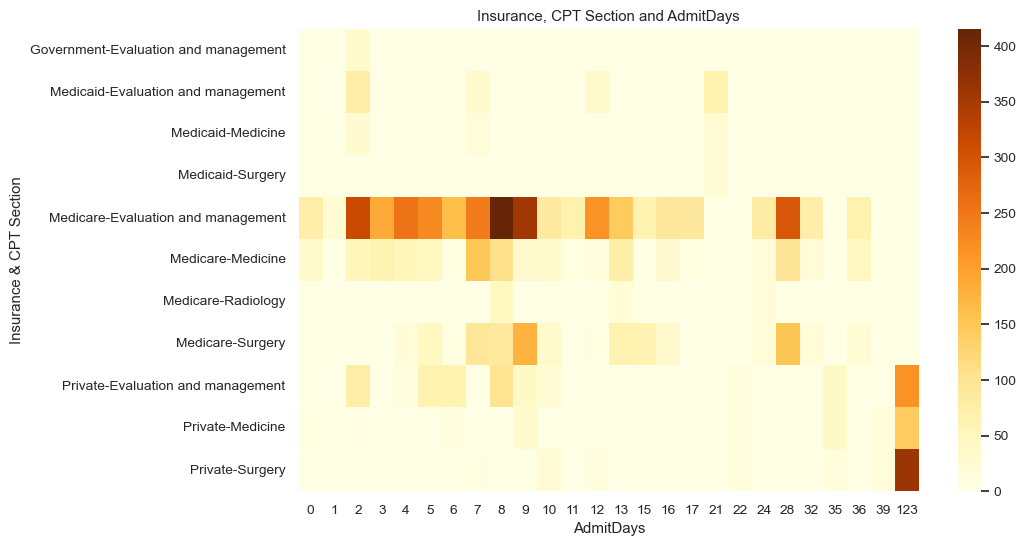

In [30]:
# Create heatmap
sns.set(font_scale=0.9)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=False, fmt='g', cmap='YlOrBr')
plt.title("Insurance, CPT Section and AdmitDays")
plt.xlabel("AdmitDays")
plt.ylabel("Insurance & CPT Section")

# Show plot
plt.show()

### Time Series

In [31]:
time_series = df_pat_adm_diag_lbl_svcs_cpt_icu[['insurance','cpt_section', 'ethnicity', 'admitdays', 'admityear']]
time_series.head()

,insurance,cpt_section,ethnicity,admitdays,admityear
0,Medicare,Evaluation and management,BLACK/AFRICAN AMERICAN,8,2164
1,Medicare,Evaluation and management,BLACK/AFRICAN AMERICAN,8,2164
2,Medicare,Evaluation and management,BLACK/AFRICAN AMERICAN,8,2164
3,Medicare,Evaluation and management,BLACK/AFRICAN AMERICAN,8,2164
4,Medicare,Evaluation and management,BLACK/AFRICAN AMERICAN,8,2164


In [32]:
time_series = time_series.groupby(['insurance','cpt_section', 'ethnicity', 'admityear'])['admitdays'].mean().reset_index()

In [33]:
# Avoid any significantly huge outliers from the data
time_series = time_series[time_series["admitdays"] < 75]

In [34]:
time_series.head()

,insurance,cpt_section,ethnicity,admityear,admitdays
0,Government,Evaluation and management,WHITE,2128,2.000000
1,Medicaid,Evaluation and management,AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGN...,2127,18.088235
2,Medicaid,Evaluation and management,UNKNOWN/NOT SPECIFIED,2115,2.000000
3,Medicaid,Evaluation and management,WHITE,2144,7.000000
4,Medicaid,Medicine,AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGN...,2127,21.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


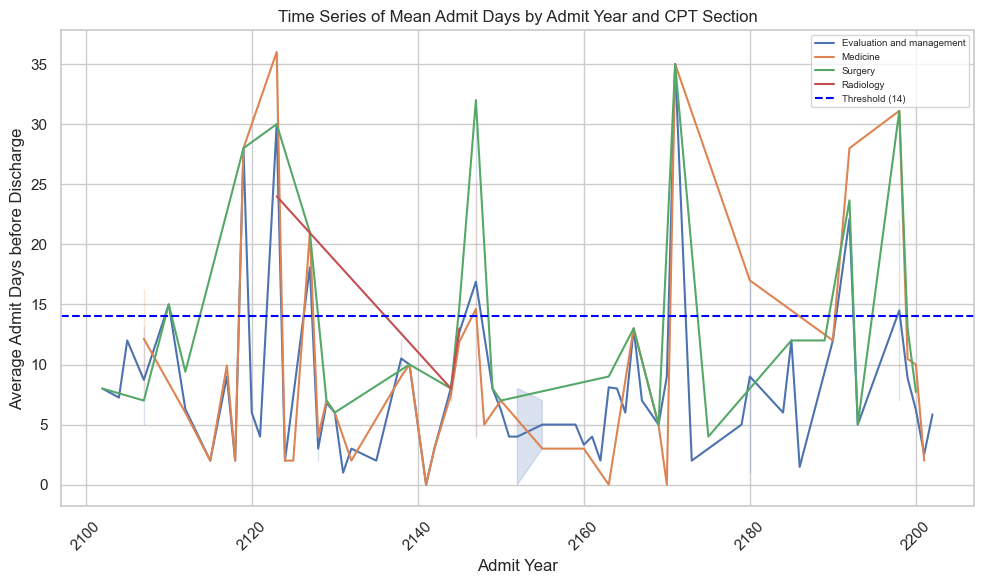

In [35]:
# Plot the time series for average admit days per admit year by cpt section
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(data=time_series, x='admityear', y='admitdays', hue='cpt_section')

# Add a horizontal line for threshold
threshold = 14  # Set your threshold value
plt.axhline(y=threshold, color='blue', linestyle='dashed', label=f'Threshold ({threshold})')

plt.title("Time Series of Mean Admit Days by Admit Year and CPT Section")
plt.xlabel("Admit Year")
plt.ylabel("Average Admit Days before Discharge")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc=1, fontsize = 7)
plt.show()

### Scatter Plot

In [36]:
scatterplot = df_pat_adm_diag_lbl_svcs_cpt_icu[['subject_id','age', 'gender','cpt_section','los']]
scatterplot.head()

,subject_id,age,gender,cpt_section,los
0,10006,71,F,Evaluation and management,1.6325
1,10006,71,F,Evaluation and management,1.6325
2,10006,71,F,Evaluation and management,1.6325
3,10006,71,F,Evaluation and management,1.6325
4,10006,71,F,Evaluation and management,1.6325


In [37]:
scatterplot= scatterplot.groupby(['subject_id','age', 'gender','cpt_section'])['los'].mean().reset_index()
scatterplot.head()

,subject_id,age,gender,cpt_section,los
0,10006,71,F,Evaluation and management,1.6325
1,10013,87,F,Medicine,2.6499
2,10017,77,F,Evaluation and management,2.1436
3,10017,77,F,Surgery,2.1436
4,10019,48,M,Evaluation and management,1.2938


In [38]:
# Avoiding any significantly huge outliers from the data
scatterplot = scatterplot[scatterplot["los"] < 120]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Mean Length of ICU Stay by Gender and CPT_Section')

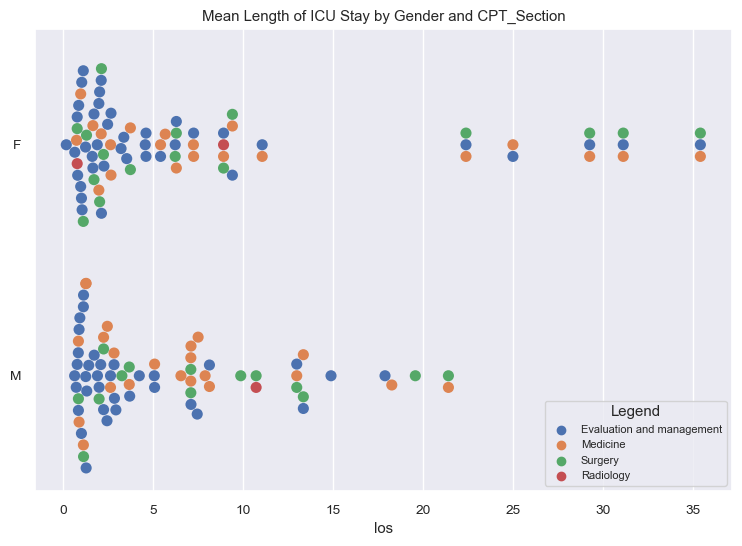

In [39]:
sns.set_theme(style="dark", palette="husl")
sns.set(font_scale=0.9)
plt.figure(figsize=(9, 6))

# Create a categorical scatterplot to show each observation
ax = sns.swarmplot(data=scatterplot, x="los", y="gender", hue="cpt_section", size=8)
ax.set(ylabel="")
plt.legend(title="Legend", loc="lower right", fontsize = 8)

plt.title("Mean Length of ICU Stay by Gender and CPT_Section")

### Joint Plot

In [40]:
joint_plot = df_pat_adm_diag_lbl_svcs_cpt_icu[['subject_id','age', 'admityear', 'diagnosis', 'curr_service', 'gender','ethnicity','cpt_section','los']]
joint_plot.head()

,subject_id,age,admityear,diagnosis,curr_service,gender,ethnicity,cpt_section,los
0,10006,71,2164,SEPSIS,MED,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
1,10006,71,2164,SEPSIS,MED,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
2,10006,71,2164,SEPSIS,MED,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
3,10006,71,2164,SEPSIS,MED,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
4,10006,71,2164,SEPSIS,MED,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325


In [41]:
joint_plot= joint_plot.groupby(['subject_id','age', 'admityear', 'diagnosis', 'curr_service', 'gender','ethnicity','cpt_section'])['los'].mean().reset_index()
# Avoiding any significantly huge outliers from the data
joint_plot = joint_plot[joint_plot["los"] < 100]
joint_plot = joint_plot[joint_plot["age"] > 25]
joint_plot.head()

,subject_id,age,admityear,diagnosis,curr_service,gender,ethnicity,cpt_section,los
0,10006,71,2164,SEPSIS,MED,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
1,10013,87,2125,SEPSIS,MED,F,UNKNOWN/NOT SPECIFIED,Medicine,2.6499
2,10017,77,2149,HUMERAL FRACTURE,MED,F,WHITE,Evaluation and management,2.1436
3,10017,77,2149,HUMERAL FRACTURE,MED,F,WHITE,Surgery,2.1436
4,10019,48,2163,ALCOHOLIC HEPATITIS,MED,M,WHITE,Evaluation and management,1.2938


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Length of ICU Stay by Age')

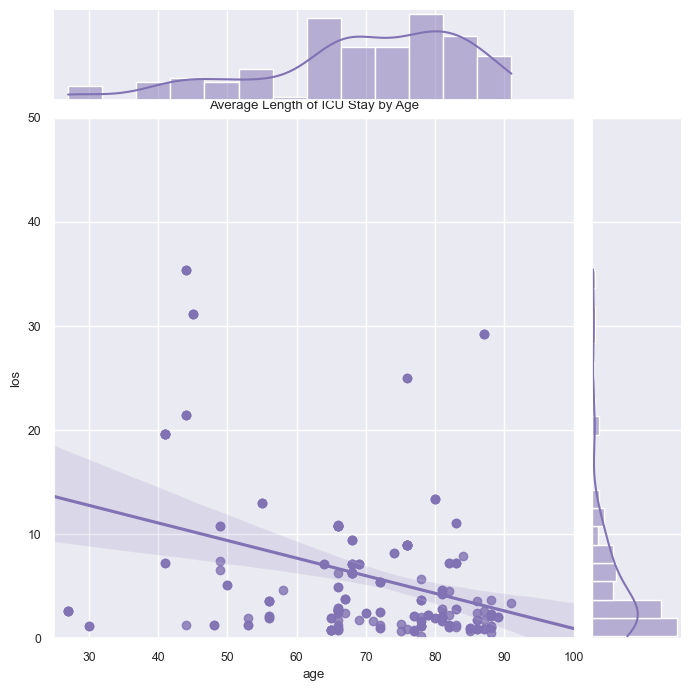

In [42]:
sns.set_theme(style="dark", palette='muted')
sns.set(font_scale=0.8)

# Create a Joint Plot chart
g = sns.jointplot(x="age", y="los", data=joint_plot,
                  kind="reg", truncate=False,
                  xlim=(25, 100), ylim=(0, 50),
                  color="m", height=7)

plt.title("Average Length of ICU Stay by Age")

### Scatter Plot (using Vega-Altair Package)

In [43]:
alt_scatterplot = df_pat_adm_diag_lbl_svcs_cpt_icu[['subject_id','age', 'admityear', 'gender','ethnicity','cpt_section','los']]
alt_scatterplot.head()

,subject_id,age,admityear,gender,ethnicity,cpt_section,los
0,10006,71,2164,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
1,10006,71,2164,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
2,10006,71,2164,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
3,10006,71,2164,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
4,10006,71,2164,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325


In [44]:
alt_scatterplot= alt_scatterplot.groupby(['subject_id','age', 'admityear', 'gender','ethnicity', 'cpt_section'])['los'].mean().reset_index()
alt_scatterplot.head()

,subject_id,age,admityear,gender,ethnicity,cpt_section,los
0,10006,71,2164,F,BLACK/AFRICAN AMERICAN,Evaluation and management,1.6325
1,10013,87,2125,F,UNKNOWN/NOT SPECIFIED,Medicine,2.6499
2,10017,77,2149,F,WHITE,Evaluation and management,2.1436
3,10017,77,2149,F,WHITE,Surgery,2.1436
4,10019,48,2163,M,WHITE,Evaluation and management,1.2938


In [45]:
alt.Chart(alt_scatterplot, title = "Length of ICU Stay by Admit Year and Ethnicity").mark_point(filled = True).encode(
    alt.X('admityear', scale=alt.Scale(domain=[2080, 2250])),
    alt.Y('los'),
    alt.Color('ethnicity'),
    alt.Size ('age'),
    alt.OpacityValue(1.5),
     tooltip = [alt.Tooltip('admityear'),
               alt.Tooltip('los'),
               alt.Tooltip('ethnicity'),
               alt.Tooltip('age')]
).interactive().properties(width = 800, height = 450)

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)